<a href="https://colab.research.google.com/github/jishu123456789/ML_SRIP-24/blob/main/5ClassClassification_Pretrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

print(device)

Mounted at /content/drive
cuda


In [ ]:
"Let us first divide the test and train data into proper format"

import os
import shutil
import random

base_dir = "animals"

animal_dir = "//content//drive//My Drive//DeepLearningCollab//Animal"
os.makedirs(animal_dir , exist_ok=True)

# Now we go into the directry containing the animals


source_dir = "//content//drive//My Drive//DeepLearningCollab//animals"

#Destination Directories

train_dir = os.path.join(animal_dir , 'train')
test_dir = os.path.join(animal_dir , 'test')

"If train and test directories do not exist"

os.makedirs(train_dir , exist_ok=True)
os.makedirs(test_dir , exist_ok=True)

"Now  we can list all the directories in source_dir"

animal_directories_list = os.listdir(source_dir)

"Now we will loop through the directories"

for animal in animal_directories_list:
    animal_D = os.path.join(source_dir , animal)

    # Get a list of all the image files in the directory animal_D
    images = [i for i in os.listdir(animal_D) if os.path.isfile(os.path.join(animal_D , i))]

    train_test_spllit = 0.8

    num_train = int(len(images) * train_test_spllit)

    random.shuffle(images) # Shuffle the images randomly
    train_images = images[:num_train]

    test_images = images[num_train:]


    # Now we have already created test and train directory but here we have to also create test and train for each of the animals

    train_dir_animal = os.path.join(train_dir , animal)
    test_dir_animal = os.path.join(test_dir , animal)

    os.makedirs(train_dir_animal , exist_ok=True)
    os.makedirs(test_dir_animal , exist_ok=True)

    "Finally we have to move all the images from source directory to destination directory using shuttle"
    for img in train_images:
        shutil.move(os.path.join(animal_D , img) , os.path.join(train_dir_animal , img))
    for img in test_images:
        shutil.move(os.path.join(animal_D , img) , os.path.join(test_dir_animal , img))

In [ ]:
from pathlib import Path


train_path = os.path.join(animal_dir , "train")
test_path = os.path.join(animal_dir , "test")

animal_dir = Path(animal_dir)



# Using This we have also found out the class names and now we can convert them into Dict format

from typing import Tuple , Dict , List
train_path = Path(train_path)
test_path = Path(test_path)

def find_classes(directory : str) -> Tuple[List[str] , Dict[str,int]] :

    "Get the class_names first"

    classes = sorted(
        entry.name for entry in list(os.scandir(directory)) if entry.is_dir()
    )

    # Get the case to handle any kind of error

    if not classes:
        raise FileNotFoundError(f"Could not find any classes in {directory}")

    classes_to_idx = {cls_name : i for i , cls_name in enumerate(classes)}

    return classes , classes_to_idx

In [ ]:
# Now we will be making the CustomDataset for the 5 Class Classification

"Now we will enter into the part where we will be transforming the image and creating Datasets and DataLoaders"
from torch.utils.data import DataLoader , TensorDataset , Dataset
from torchvision import transforms
import random
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

"Lets write the transform for training Data and Testing Data"

transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),   #must same as here
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(p = 0.5), # data augmentation
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # normalization
])
transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),   #must same as here
    transforms.CenterCrop((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])



In [ ]:
class_list , _ = find_classes(train_path)

In [ ]:
animal_classes = {
    'antelope': 1, 'badger': 1, 'bat': 1, 'bear': 1, 'bee': 3, 'beetle': 3, 'bison': 1, 'boar': 1, 'butterfly': 3, 'cat': 1, 'caterpillar': 3, 'chimpanzee': 1, 'cockroach': 3, 'cow': 1, 'coyote': 1, 'crab': 4, 'crow': 0, 'deer': 1, 'dog': 1, 'dolphin': 4, 'donkey': 1, 'dragonfly': 3, 'duck': 0, 'eagle': 0, 'elephant': 1, 'flamingo': 0, 'fly': 3, 'fox': 1, 'goat': 1, 'goldfish': 4, 'goose': 0, 'gorilla': 1, 'grasshopper': 3, 'hamster': 1, 'hare': 1, 'hedgehog': 1, 'hippopotamus': 1, 'hornbill': 0, 'horse': 1, 'hummingbird': 0, 'hyena': 1, 'jellyfish': 4, 'kangaroo': 1, 'koala': 1, 'ladybugs': 3, 'leopard': 1, 'lion': 1, 'lizard': 2, 'lobster': 4, 'mosquito': 3, 'moth': 3, 'mouse': 1, 'octopus': 4, 'okapi': 1, 'orangutan': 1, 'otter': 1, 'owl': 0, 'ox': 1, 'oyster': 4, 'panda': 1, 'parrot': 0, 'pelecaniformes': 0, 'penguin': 0, 'pig': 1, 'pigeon': 0, 'porcupine': 1, 'possum': 1, 'raccoon': 1, 'rat': 1, 'reindeer': 1, 'rhinoceros': 1, 'sandpiper': 0, 'seahorse': 4, 'seal': 4, 'shark': 4, 'sheep': 1, 'snake': 2, 'sparrow': 0, 'squid': 4, 'squirrel': 1, 'starfish': 4, 'swan': 0, 'tiger': 1, 'turkey': 0, 'turtle': 2, 'whale': 4, 'wolf': 1, 'wombat': 1, 'woodpecker': 0, 'zebra': 1
}


# Printing the updated animal classification dictionary
print(len(animal_classes))


90


In [ ]:
# Now we will be making a Custom Dataset where we shall give labels to each class

class CustomDataset(Dataset):
    def __init__(self , target_directory : str , transform = None):
      super().__init__()

      self.target_directory = target_directory
      self.transform = transform

      self.label = []
      self.img = []

      # Now we shall start making the dataset

      classes , _ = find_classes(target_directory)

      for cls in classes:
        directory_name = os.path.join(target_directory , cls)
        for img in os.listdir(directory_name):
          final_path = os.path.join(directory_name , img)
          self.img.append(final_path)
          self.label.append(animal_classes[cls])

    def __len__(self):
      return len(self.img)
    def load_image(self , index : int) -> Image.Image:
      image_path = self.img[index]
      imge = Image.open(image_path)
      imge.show()
      return imge
    def __getitem__(self , index : int):
      image = Image.open(self.img[index])
      label = self.label[index]
      if self.transform:
        image = self.transform(image)
      return image , torch.tensor(label , dtype = torch.long)

In [ ]:
# Again We Can Build This Model in two ways : Either By Using A PreTrained Model or By using a Custom CNN architechture

# First we shall explore the possibility of using a custom CNN architechture : Because it is representative in Nature

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import transforms
from sklearn.model_selection import KFold

# Define your CustomDataset class and other necessary imports
# Assuming you have already defined CustomDataset and other imports



# Second Model

class CustomCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(200704,1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,5)
        )

    def forward(self, xb):
        return self.network(xb)

FOLD :  0
Epoch: 0 Loss: 0.5265673697822624 Acc: 84.16666666666667
[Test #1] Loss: 0.0070 Acc: 93.4028% 
Epoch: 1 Loss: 0.23714353297319676 Acc: 92.15277777777779
[Test #2] Loss: 0.0063 Acc: 93.6111% 
Epoch: 2 Loss: 0.15523428041487933 Acc: 95.24305555555556
[Test #3] Loss: 0.0049 Acc: 94.5139% 
Epoch: 3 Loss: 0.13845164419876205 Acc: 95.65972222222221
[Test #4] Loss: 0.0053 Acc: 93.9583% 
Epoch: 4 Loss: 0.13547975449926322 Acc: 96.04166666666667
[Test #5] Loss: 0.0054 Acc: 93.8889% 
Epoch: 5 Loss: 0.1267199092855056 Acc: 95.86805555555557
[Test #6] Loss: 0.0056 Acc: 94.2361% 
Epoch: 6 Loss: 0.1279640608260201 Acc: 95.52083333333333
[Test #7] Loss: 0.0049 Acc: 94.3056% 
Epoch: 7 Loss: 0.12134704077616335 Acc: 95.69444444444444
[Test #8] Loss: 0.0053 Acc: 93.6806% 
Epoch: 8 Loss: 0.0993244342195491 Acc: 96.7013888888889
[Test #9] Loss: 0.0053 Acc: 94.5139% 
Epoch: 9 Loss: 0.09847519553990827 Acc: 96.66666666666667
[Test #10] Loss: 0.0053 Acc: 94.0972% 
Epoch: 10 Loss: 0.1032439713107628

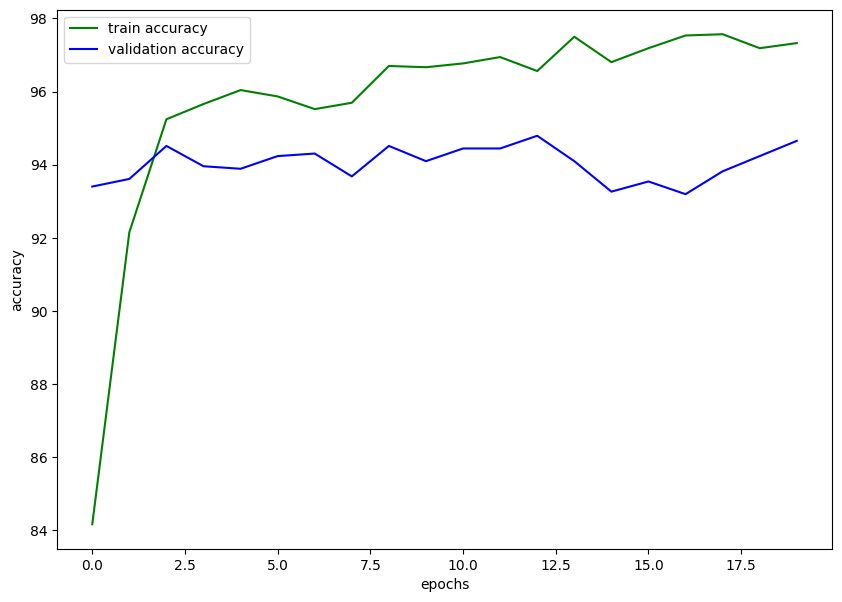

FOLD :  1


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch: 0 Loss: 0.520071428683069 Acc: 84.0625
[Test #1] Loss: 0.0067 Acc: 93.1250% 
Epoch: 1 Loss: 0.20973575918210877 Acc: 92.84722222222223
[Test #2] Loss: 0.0060 Acc: 93.4722% 
Epoch: 2 Loss: 0.15594819397148157 Acc: 94.86111111111111
[Test #3] Loss: 0.0055 Acc: 94.2361% 
Epoch: 3 Loss: 0.13918017295913565 Acc: 95.38194444444444
[Test #4] Loss: 0.0061 Acc: 93.2639% 
Epoch: 4 Loss: 0.1286171905282471 Acc: 95.38194444444444
[Test #5] Loss: 0.0054 Acc: 94.0972% 
Epoch: 5 Loss: 0.11926570425017012 Acc: 95.90277777777779
[Test #6] Loss: 0.0058 Acc: 94.3056% 
Epoch: 6 Loss: 0.10928685357794166 Acc: 96.14583333333334
[Test #7] Loss: 0.0056 Acc: 93.6806% 
Epoch: 7 Loss: 0.11904435334727168 Acc: 95.79861111111111
[Test #8] Loss: 0.0068 Acc: 92.0139% 
Epoch: 8 Loss: 0.09914840874779556 Acc: 96.31944444444444
[Test #9] Loss: 0.0053 Acc: 94.5139% 
Epoch: 9 Loss: 0.10510166437468595 Acc: 96.38888888888889
[Test #10] Loss: 0.0052 Acc: 95.2083% 
Epoch: 10 Loss: 0.10202500483848982 Acc: 96.38888888

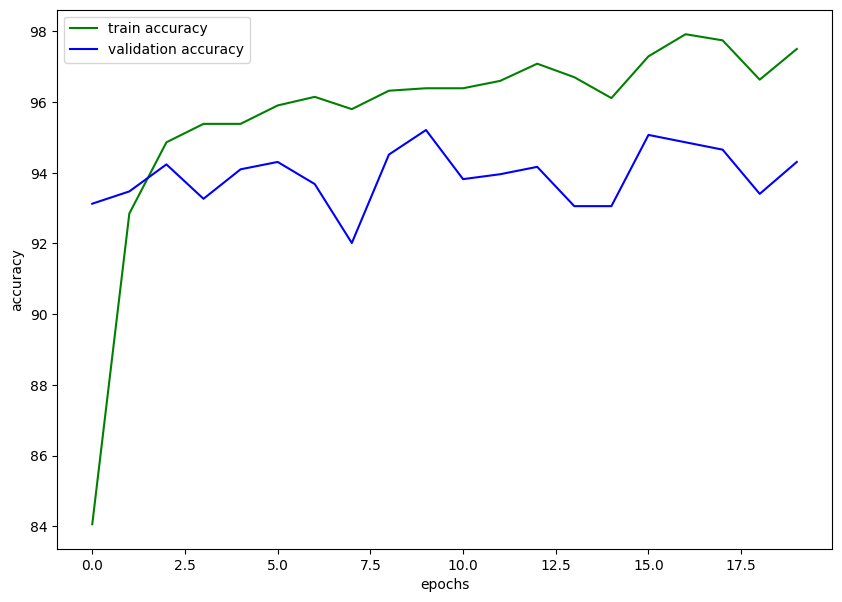

FOLD :  2


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch: 0 Loss: 0.5064221209949917 Acc: 84.82638888888889
[Test #1] Loss: 0.0068 Acc: 93.8889% 
Epoch: 1 Loss: 0.18160854664941628 Acc: 94.0625
[Test #2] Loss: 0.0065 Acc: 93.3333% 
Epoch: 2 Loss: 0.16016991546170578 Acc: 94.47916666666667
[Test #3] Loss: 0.0058 Acc: 93.5417% 
Epoch: 3 Loss: 0.14098862084663577 Acc: 95.55555555555556
[Test #4] Loss: 0.0057 Acc: 93.5417% 
Epoch: 4 Loss: 0.1275396386989289 Acc: 95.72916666666667
[Test #5] Loss: 0.0060 Acc: 93.4722% 
Epoch: 5 Loss: 0.12977279951382015 Acc: 95.79861111111111
[Test #6] Loss: 0.0059 Acc: 93.8889% 
Epoch: 6 Loss: 0.12072674815232555 Acc: 96.11111111111111
[Test #7] Loss: 0.0067 Acc: 93.1944% 
Epoch: 7 Loss: 0.11190463244501088 Acc: 96.25
[Test #8] Loss: 0.0061 Acc: 93.4722% 
Epoch: 8 Loss: 0.08800139799714088 Acc: 97.22222222222221
[Test #9] Loss: 0.0058 Acc: 93.7500% 
Epoch: 9 Loss: 0.09131740076312174 Acc: 97.01388888888889
[Test #10] Loss: 0.0061 Acc: 93.8889% 
Epoch: 10 Loss: 0.0937925036996603 Acc: 96.90972222222223
[Test

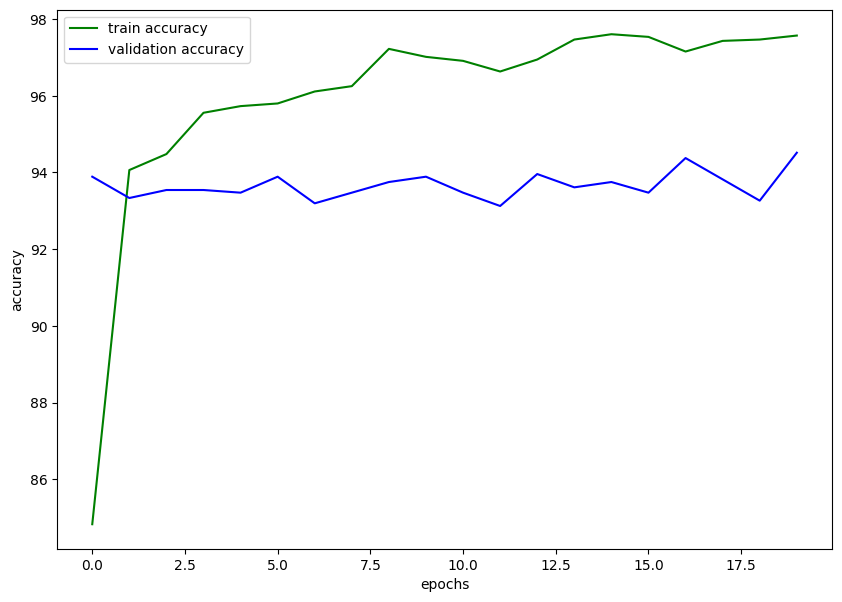

Test_Accuracy : 95.74074074074073
Confusion Matrix on the test set
[[186   6   1   7   4]
 [  5 546   0   1   0]
 [  1   1  28   3   3]
 [  1   1   0 130   0]
 [  4   4   2   2 144]]


In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, train_test_split

from torchvision import models




# Define Stratified K-Fold cross-validation
skf = KFold(n_splits=3, shuffle=True)

# Get the lists for printing the confusion matrix

true_labels = []
predicted_labels = []

# Now we Load the custom Training And Testing Data

train_data = CustomDataset(train_path , transform = transforms_train)
test_data = CustomDataset(test_path , transform = transforms_test)

indices = list(range(len(train_data)))

# Now create the testloader for test_data

test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=True, num_workers=4)

for fold, (train_index, val_index) in enumerate(skf.split(indices, [train_data.label[idx] for idx in indices])):
  val_true_labels = []
  val_predicted_labels = []

  print("FOLD : " , fold)
  train_sampler = torch.utils.data.SubsetRandomSampler(train_index)
  val_sampler = torch.utils.data.SubsetRandomSampler(val_index)

  # Create data loaders for training and validation
  train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, sampler=train_sampler, num_workers=4)
  val_loader = torch.utils.data.DataLoader(train_data, batch_size=32, sampler=val_sampler, num_workers=4)



  # Since Resnet50 has 1000 out_features we will need to change it because our model has 1000 features.

  model = models.resnet50(pretrained=True)

  # Since Resnet50 has 1000 out_features we will need to change it because our model has 1000 features.

  num_features = model.fc.in_features
  # Add a fully-connected layer for classification
  model.fc = nn.Linear(num_features, 5)
  model = model.to(device)

  # Define the loss function

  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=5e-5)

  num_epochs = 20

  train_loss=[]
  train_accuracy=[]
  test_loss=[]
  test_accuracy=[]

  for epoch in range(num_epochs):
      model.train()
      running_loss = 0
      running_corrects = 0
      total_train = 0

      # Now we load a Batch of Images

      for i , (images, labels) in enumerate(train_loader):
          images = images.to(device)
          labels = labels.to(device)

          optimizer.zero_grad()
          outputs = model(images)

          _ , preds = torch.max(outputs , 1)


          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item() * images.size(0)
          running_corrects += torch.sum(preds == labels.data)
          total_train += labels.size(0)

      epoch_loss = running_loss / total_train
      epoch_acc = running_corrects.double() / total_train * 100

      print('Epoch: {} Loss: {} Acc: {}'.format(epoch, epoch_loss, epoch_acc))

      train_loss.append(epoch_loss)
      train_accuracy.append(epoch_acc)

      model.eval()
      with torch.no_grad():
        running_loss = 0
        running_corrects = 0
        total_val = 0

        for i , (inputs , labels) in enumerate(val_loader):
          inputs = inputs.to(device)
          labels = labels.to(device)
          outputs = model.forward(inputs)

          _ , preds = torch.max(outputs , 1)

          loss = criterion(outputs , labels)

          running_loss += loss.item()
          total_val += labels.size(0)
          running_corrects += torch.sum(preds == labels.data).item()
          val_true_labels.extend(labels.cpu().numpy())
          val_predicted_labels.extend(preds.cpu().numpy())

        epoch_loss = running_loss / len(val_sampler)
        epoch_acc = running_corrects / total_val *100

        # Append result

        test_loss.append(epoch_loss)
        test_accuracy.append(epoch_acc)

        # Print progress
        print('[Test #{}] Loss: {:.4f} Acc: {:.4f}% '.format(epoch+1, epoch_loss, epoch_acc))


  print('Confusion Matrix on the validation set Fold :' , fold)
  print(confusion_matrix(val_true_labels, val_predicted_labels))

  plt.figure(figsize=(10, 7))
  train_accuracy_tensor = torch.tensor(train_accuracy).cpu()
  test_accuracy_tensor = torch.tensor(test_accuracy).cpu()

  plt.plot(train_accuracy_tensor, color='green', label='train accuracy')
  plt.plot(test_accuracy_tensor, color='blue', label='validation accuracy')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

with torch.no_grad():
  running_corrects = 0
  total_test = 0

  for i , (inputs , labels) in enumerate(test_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model.forward(inputs)
    _ , preds = torch.max(outputs , 1)
    running_corrects += torch.sum(preds == labels.data).item()
    total_test += labels.size(0)
    true_labels.extend(labels.cpu().numpy())
    predicted_labels.extend(preds.cpu().numpy())

  epoch_acc = running_corrects / total_test *100

  print("Test_Accuracy :" , epoch_acc)

  print('Confusion Matrix on the test set')
  print(confusion_matrix(true_labels, predicted_labels))











In [ ]:
import torch

# Assuming your model is named 'model'
torch.save(model.state_dict(), 'PreTrained5ClassClassification.pth')